<a href="https://colab.research.google.com/github/moh495/Regression/blob/master/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import matplotlib as mpl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from cycler import cycler


raw_light_palette = [
    (0, 122, 255), # Blue
    (255, 149, 0), # Orange
    (52, 199, 89), # Green
    (255, 59, 48), # Red
    (175, 82, 222),# Purple
    (255, 45, 85), # Pink
    (88, 86, 214), # Indigo
    (90, 200, 250),# Teal
    (255, 204, 0)  # Yellow
]

raw_dark_palette = [
    (10, 132, 255), # Blue
    (255, 159, 10), # Orange
    (48, 209, 88),  # Green
    (255, 69, 58),  # Red
    (191, 90, 242), # Purple
    (94, 92, 230),  # Indigo
    (255, 55, 95),  # Pink
    (100, 210, 255),# Teal
    (255, 214, 10)  # Yellow
]

raw_gray_light_palette = [
    (142, 142, 147),# Gray
    (174, 174, 178),# Gray (2)
    (199, 199, 204),# Gray (3)
    (209, 209, 214),# Gray (4)
    (229, 229, 234),# Gray (5)
    (242, 242, 247),# Gray (6)
]

raw_gray_dark_palette = [
    (142, 142, 147),# Gray
    (99, 99, 102),  # Gray (2)
    (72, 72, 74),   # Gray (3)
    (58, 58, 60),   # Gray (4)
    (44, 44, 46),   # Gray (5)
    (28, 28, 39),   # Gray (6)
]


light_palette = np.array(raw_light_palette)/255
dark_palette = np.array(raw_dark_palette)/255
gray_light_palette = np.array(raw_gray_light_palette)/255
gray_dark_palette = np.array(raw_gray_dark_palette)/255

mpl.rcParams['axes.prop_cycle'] = cycler('color',dark_palette)
mpl.rcParams['figure.facecolor']  = gray_dark_palette[-2]
mpl.rcParams['figure.edgecolor']  = gray_dark_palette[-2]
mpl.rcParams['axes.facecolor'] =  gray_dark_palette[-2]

white_color = gray_light_palette[-2]
mpl.rcParams['text.color'] = white_color
mpl.rcParams['axes.labelcolor'] = white_color
mpl.rcParams['axes.edgecolor'] = white_color
mpl.rcParams['xtick.color'] = white_color
mpl.rcParams['ytick.color'] = white_color

mpl.rcParams['figure.dpi'] = 200

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

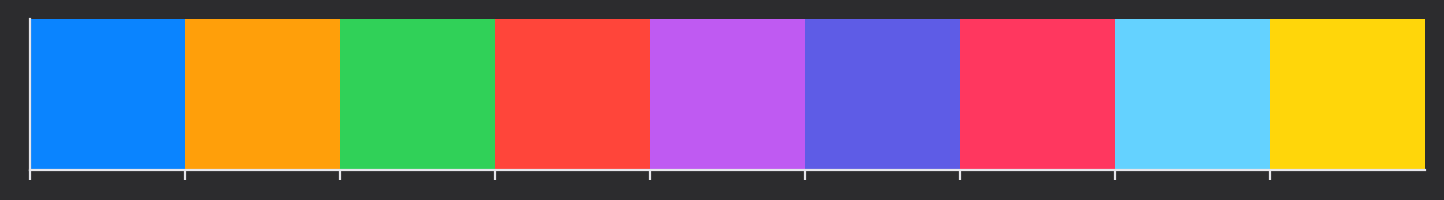

In [26]:
sns.palplot(dark_palette)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [6]:
import io
dftrain = pd.read_csv('CarPrice_Assignment.csv')

In [7]:
dftrain.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# **Kbel men Bedaw f data preprocessing Lazem n3erfo wech rana baghyin ndiro Men Had data , Awalan Rana baghyin ndiro la prédiction du prix te3 des voitures ya3ni 3adena des inputs (Features) w Output (Target)**


1.   **Target (Y)** = Price
2.   **Features (X)** = (ge3 les colonnes sauf the price)



# ***DATA ANALYSIS***

In [8]:
# data analysis and wrangling
import numpy as np  #Linear Algebra
import pandas as pd  #Kima Excel besa7 library
import matplotlib.pyplot as plt #Data visualization
import seaborn as sns  #Kima matplotlib besa7 hwa zwin 3lih 
%matplotlib inline
# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor

In [9]:
df = dftrain.copy()

# ***Data Pre-Processing***

In [10]:
df.head(6)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250.0


In [11]:
#NECHOUFO Ch7el men colonnes w lignes 3dena f had data
df.shape

(205, 26)

In [12]:
#NEchoufo les colonnes ki Dayrin 
#Bach NEfahmo chaque feature wech te3na voila le lien : 
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [13]:
len(df)

205

In [14]:
#Nzidou nechoufo kter des informations 3la had la data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [15]:
#Nechoufo les features categorical and numerical 
cat_variables = df.select_dtypes(include=['object']).columns
num_variables = df.select_dtypes([np.int64,np.float64]).columns

In [16]:
cat_variables #Features Categorical 

Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')

In [17]:
cat_variables = df.select_dtypes(include=['object'])
cat_variables.sample(10)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
93,nissan titan,gas,std,four,wagon,fwd,front,ohc,four,2bbl
103,nissan otti,gas,std,four,sedan,fwd,front,ohcv,six,mpfi
13,bmw x3,gas,std,four,sedan,rwd,front,ohc,six,mpfi
128,porsche boxter,gas,std,two,convertible,rwd,rear,ohcf,six,mpfi
200,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
114,peugeot 505s turbo diesel,diesel,turbo,four,wagon,rwd,front,l,four,idi
142,subaru brz,gas,std,four,sedan,fwd,front,ohcf,four,2bbl
194,volvo 145e (sw),gas,std,four,sedan,rwd,front,ohc,four,mpfi
18,chevrolet impala,gas,std,two,hatchback,fwd,front,l,three,2bbl
78,mitsubishi outlander,gas,std,two,hatchback,fwd,front,ohc,four,2bbl


In [18]:
num_variables #Feature Numerical

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [19]:
num_variables = df.select_dtypes([np.int64,np.float64])
num_variables.sample(10)

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
73,74,0,120.9,208.1,71.7,56.7,3900,308,3.80,3.350,8.0,184,4500,14,16,40960.0
86,87,1,96.3,172.4,65.4,51.6,2405,122,3.35,3.460,8.5,88,5000,25,32,8189.0
159,160,0,95.7,166.3,64.4,52.8,2275,110,3.27,3.350,22.5,56,4500,38,47,7788.0
55,56,3,95.3,169.0,65.7,49.6,2380,70,3.33,3.255,9.4,101,6000,17,23,10945.0
96,97,1,94.5,165.3,63.8,54.5,1971,97,3.15,3.290,9.4,69,5200,31,37,7499.0
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.870,8.8,134,5500,18,23,21485.0
39,40,0,96.5,175.4,65.2,54.1,2304,110,3.15,3.580,9.0,86,5800,27,33,8845.0
78,79,2,93.7,157.3,64.4,50.8,2004,92,2.97,3.230,9.4,68,5500,31,38,6669.0
186,187,2,97.3,171.7,65.5,55.7,2275,109,3.19,3.400,9.0,85,5250,27,34,8495.0
42,43,1,96.5,169.1,66.0,51.0,2293,110,3.15,3.580,9.1,100,5500,25,31,10345.0


In [20]:
#Had Data wech parfait wla fiha missing values
total = df.isnull().sum().sort_values(ascending=False) #jme3 gee3 les features li fihom missing values w Rtebhom 
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) #7sebli pourcentage te3 missing
missing_data = pd.concat([total, percent], axis=1, keys=['ch7el men lignes khawya', 'pourcentage']) 
missing_data.head(20)

,ch7el men lignes khawya,pourcentage
car_ID,0,0.0
symboling,0,0.0
highwaympg,0,0.0
citympg,0,0.0
peakrpm,0,0.0
horsepower,0,0.0
compressionratio,0,0.0
stroke,0,0.0
boreratio,0,0.0
fuelsystem,0,0.0


# ***Sommaire1***
1. Chefna qlq lignes men La Data 
2. chefna ch7el 3dena men lignes w colonnes
3. 3refna les colonnes (features) 
4. 3refna que kayn missing values 
5. 3refna 3dena categorical and numerical values

# ***NEFAHMO Target Te3 La Data Li Hwa Price***

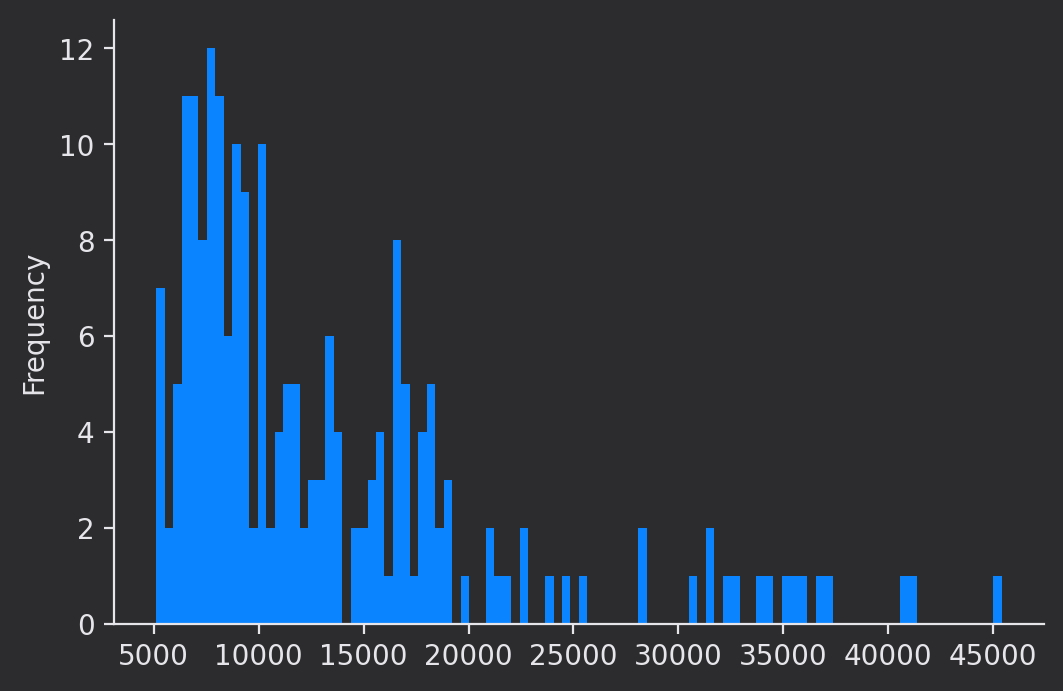

In [27]:
#N plotiw la distribution te3 target f la data
df.price.plot.hist(bins=100)

In [28]:
#Nezidou nefahmou target
mpg_min = df.price.min()
mpg_max = df.price.max()
mpg_avg = df.price.mean()
mpg_std = df.price.std()

In [29]:
#le but de ce code c'est que n3arfo ida kayen outliers wla non 
summary = {'Li7SA2YAT TE3 TARGET TE3NA': [mpg_min, mpg_max, mpg_avg, mpg_std]}
stat_mpg = pd.DataFrame(data=summary, index=['Min', 'Max','Avg','Std'])
stat_mpg

,Li7SA2YAT TE3 TARGET TE3NA
Min,5118.000000
Max,45400.000000
Avg,13276.710571
Std,7988.852332


# **Sommaire2**
1. 3dena des outliers f Target
2. 3dena Skew (biais) f target

# ***Relationship bin Features w Target***

In [30]:
df.describe() #des info sur chaque features f coté stat/proba

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [31]:
#Nechoufo la corrélation linéaire entre les features et aussi entre featues et target
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


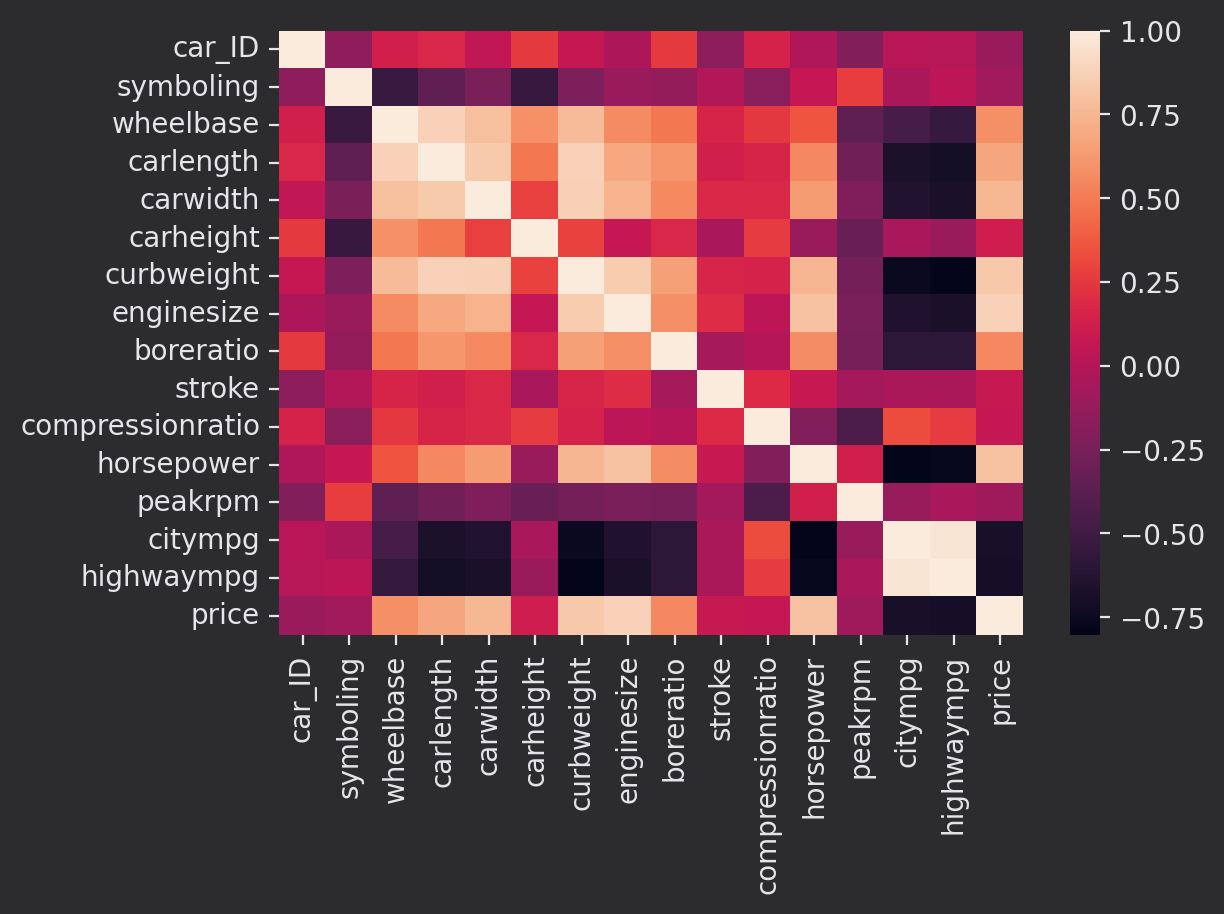

In [32]:
sns.heatmap(df.corr())

In [34]:
#Nechoufo la relation entre les features w target  
df.corr()['price'] #medlina ch7el hya la corr entre Y w chaque Feature

car_ID             -0.109093
symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

In [35]:
#Njebdou les features les plus corrélés m3a target te3na 
price_corr = df.corr()['price']
price_corr[price_corr > 0.4].index

Index(['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize',
       'boreratio', 'horsepower', 'price'],
      dtype='object')

In [37]:
corr_mat = df.corr()
price_corr = corr_mat['price']
top_corr_features = price_corr[price_corr.abs() > 0.4].index #Medlina les features li 3ndehom corrélation kbira m3a prix te3 tomobile

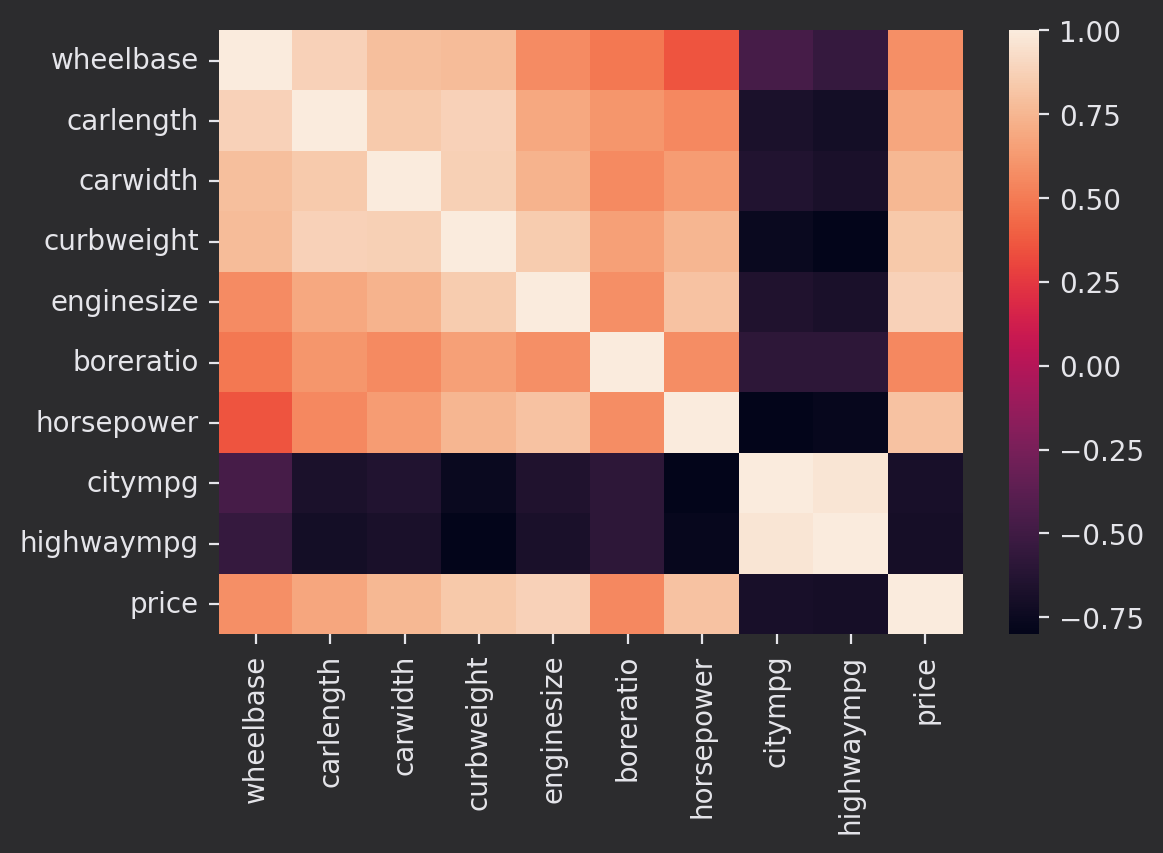

In [38]:
sns.heatmap(corr_mat.loc[top_corr_features, top_corr_features]) #Dirhom f heatmap

In [39]:
#Nechouf les features les plus corrélés men Lkbir l sghir
price_corr[price_corr.abs() > 0.4].sort_values(ascending=False)

price         1.000000
enginesize    0.874145
curbweight    0.835305
horsepower    0.808139
carwidth      0.759325
carlength     0.682920
wheelbase     0.577816
boreratio     0.553173
citympg      -0.685751
highwaympg   -0.697599
Name: price, dtype: float64

# ***Sommaire3 :***
1. Chefna les corrélation entre Target w features numériques
2. dina li 3ndehom corrélation fog 0.4 

# **Data Visualization**

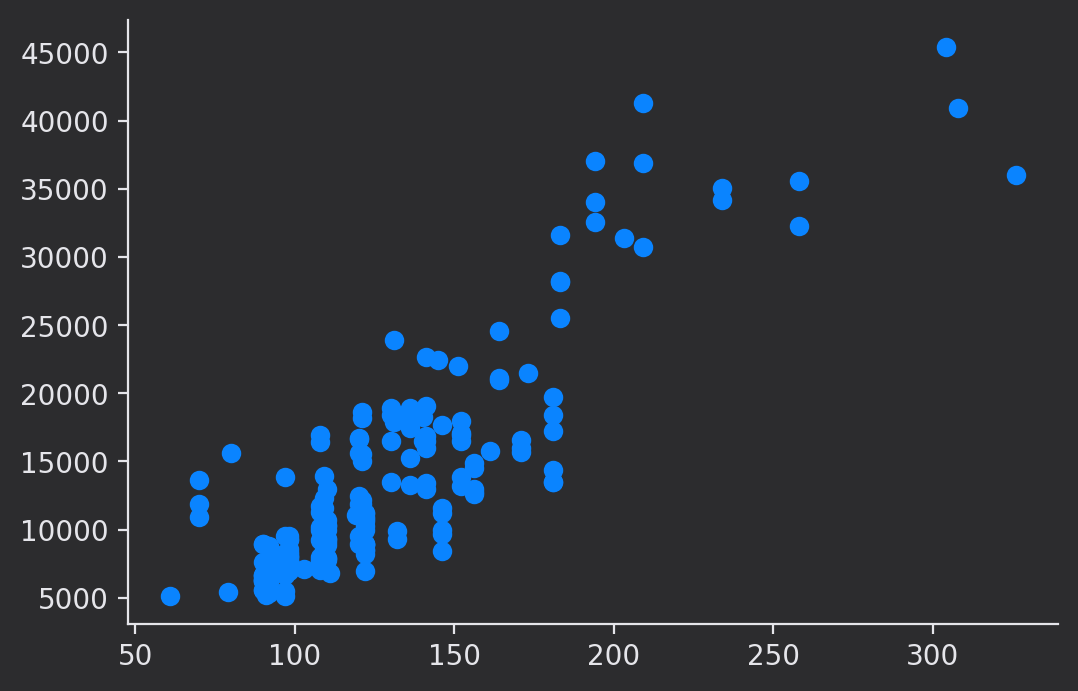

In [43]:
plt.scatter(x='enginesize', y='price', data=df)

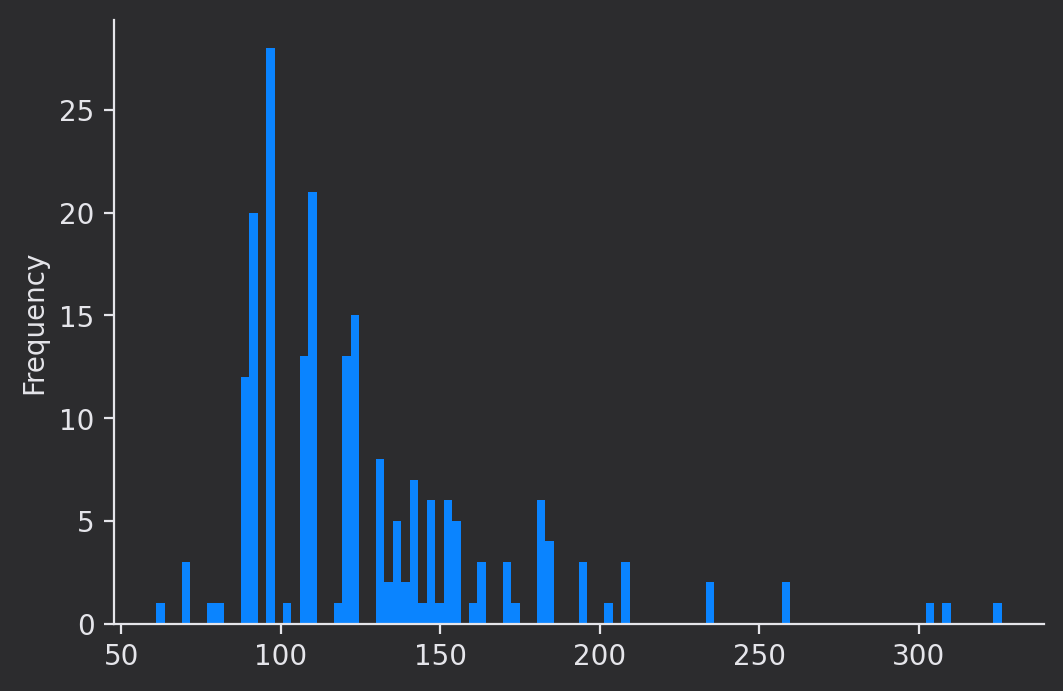

In [44]:
df.enginesize.plot.hist(bins=100)

In [46]:
df.isnull().sum().max() #nechoufou esq kayen des valeurs khawyin f data wla non...

0

In [48]:
#standardizing data
from sklearn.preprocessing import StandardScaler
saleprice_scaled = StandardScaler().fit_transform(df['price'][:,np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.02376194]
 [-1.01962107]
 [-1.01409991]
 [-0.99490134]
 [-0.98975663]
 [-0.98850182]
 [-0.97595374]
 [-0.96679363]
 [-0.96679363]
 [-0.90116715]]

outer range (high) of the distribution:
[[2.60388944]
 [2.62346446]
 [2.73288376]
 [2.7948713 ]
 [2.85133768]
 [2.96176083]
 [2.980332  ]
 [3.4737227 ]
 [3.5182684 ]
 [4.03085767]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


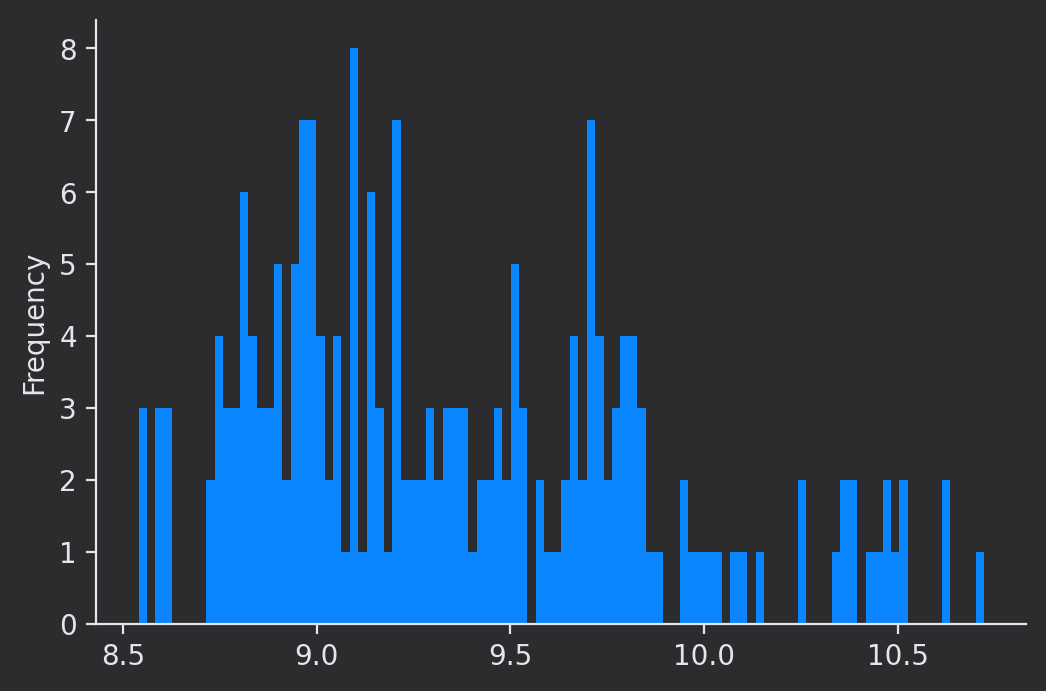

In [52]:
df['price'] = np.log(df['price'])
df.price.plot.hist(bins=100)

In [65]:
target = df['price']
features = df.drop(['car_ID', 'symboling', 'stroke', 'compressionratio' , 'horsepower', 'peakrpm', 'citympg', 'price', 'CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'], axis=1)

In [66]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=0)

In [67]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV

In [68]:
model = RidgeCV()
model.fit(x_train, y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]))

In [69]:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressorModel = RandomForestRegressor(n_estimators=100,max_depth=2, random_state=33)
model2 = RandomForestRegressor()
model2.fit(x_train, y_train)

RandomForestRegressor()

In [70]:
y_pred = model2.predict(x_test)
print('Predicted Value for Random Forest Regressor is : ' , y_pred[:10])

Predicted Value for Random Forest Regressor is :  [8.71431662 9.72175556 9.47266702 8.68662258 9.13620611 9.51498179
 8.6877306  8.97610271 9.80532545 8.80569326]


In [71]:
from sklearn.metrics import r2_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

In [72]:
r2_score(y_test, y_pred)

0.9077203987484659

In [73]:
mean_absolute_error(y_test, y_pred)

0.12447250274561593

In [74]:
pred_y_df = pd.DataFrame({'Actual Value': y_test, 'Predicted_Value': y_pred, 'Difference': y_test-y_pred})
pred_y_df[0:20]

,Actual Value,Predicted_Value,Difference
52,8.823942,8.714317,0.109626
181,9.664596,9.721756,-0.057160
5,9.632335,9.472667,0.159668
18,8.546946,8.686623,-0.139676
188,9.209840,9.136206,0.073634
170,9.323580,9.514982,-0.191402
76,8.592115,8.687731,-0.095615
154,8.974365,8.976103,-0.001738
104,9.752607,9.805325,-0.052719
33,8.784009,8.805693,-0.021684
